В этом посте будет рассмотрено то, как оптимизировать портфель путем изменения весов входящих в него активов. Под оптимизацией портфеля понимантся такое соотношение весов, которое будет уловлетворять одному из условий:

* Портфель с минимальным уровнем риском при желаемой доходности;
* Портфель с максимальной доходностью при установленном риске;
* Портфель с максимальным значением доходности

В данном посте будут рассмотрены девять акций, которые предлагает торговый робот одного из брокеров и в конце будет рассмотрено - совпадают ли веса. Так как имеется значение показателя на начало января - можно будет приблизительно оценить как сильно отличается доходность и риски робота от выполненного ручного (т.е. при помощи кода на python) расчета. 

После недолгого анализа робот мне предложил сформировать портфель из девяти акций: 'ATVI','BA','CNP','CMA', 'STZ','GPN','MPC','NEM' и 'PKI'. Так как рассматриваем инвестирование, а не трейдинг - будем рассматривать временной горизонт три года. Соответственно и данне возьмем за этот период.

In [1]:
#Загружаю библиотеки

import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ticker = ['ATVI','BA','CNP','CMA', 'STZ','GPN','MPC','NEM', 'PKI']

In [3]:
stock = yf.download(ticker,'2017-01-01', '2019-01-31')

[*********************100%***********************]  9 of 9 downloaded


Веса всех акций, входящих в портфель должны составлять единицу. В начале будут взяты те, которые предложил робот. Будет расчитана доходность и стандартное отклонение портфеля. Затем будет использована  симуляция Монте-Карло для получения оптимальных весов. 

**Симуляция Монте-Карло**

Приведу краткое описание, которое приводиться в одном из постов, о том, как применяется метод Монте -Карлоя для подбора оптимального портфеля. 

Сначала акциям задаются случайные веса. Производиться расчет доходности и стандартного отклонения и сохраняем его. Потом случайным образом меняются веса (главное не забывать, что их сумма должна составлять единицу)и повторяется предыидущих шаг - расчет и сохранение полученного значения. Количество итераций зависит от времени, машинки для расчета и риска, который готов принять инвестор. В этом посте попробуем провести 10000 расчетов для выявления портфеля, который будет удовлетворять любому из трех условий.

**Оптимизация портфеля на Python**

In [4]:
# Выделение скорректированой цены закрытия
all_adj_close = stock[['Adj Close']]
all_adj_close.round(2).head()

Adj Close                                                          
                ATVI      BA    CMA    CNP    GPN    MPC    NEM    PKI     STZ
Date                                                                          
2017-01-03     35.71  145.53  62.92  21.58  70.27  47.81  32.28  52.25  148.24
2017-01-04     36.41  147.06  63.45  21.77  72.89  46.28  32.59  52.56  151.34
2017-01-05     36.97  147.15  63.45  21.77  73.18  46.11  34.09  52.00  140.58
2017-01-06     36.94  147.51  64.12  22.26  74.21  45.50  33.02  52.37  143.15
2017-01-09     36.74  146.79  63.45  21.83  79.53  44.67  32.96  52.81  143.95

Дальше необходимо получить ежедневную доходность по каждой акции

In [5]:
all_returns = all_adj_close.pct_change()

In [6]:
all_returns.round(4).head()*100

Adj Close                                                
                ATVI    BA   CMA   CNP   GPN   MPC   NEM   PKI   STZ
Date                                                                
2017-01-03       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2017-01-04      1.96  1.05  0.84  0.88  3.73 -3.20  0.96  0.59  2.09
2017-01-05      1.54  0.06  0.00  0.00  0.40 -0.37  4.60 -1.07 -7.11
2017-01-06     -0.08  0.24  1.06  2.25  1.41 -1.32 -3.14  0.71  1.83
2017-01-09     -0.54 -0.49 -1.04 -1.93  7.17 -1.82 -0.18  0.84  0.56

Теперь можно вычислить доходность каждой акции и построить ковариационную матрицу для того чтобы оценить силу взаимосвязи элементов. 

In [7]:
mean_returns = all_returns.mean()
cov_matrix = all_returns.cov()
print (mean_returns)
print (cov_matrix)

Adj Close  ATVI    0.000711
           BA      0.001957
           CMA     0.000484
           CNP     0.000595
           GPN     0.001025
           MPC     0.000647
           NEM     0.000140
           PKI     0.001144
           STZ     0.000334
dtype: float64
               Adj Close                                                    \
                    ATVI        BA       CMA       CNP       GPN       MPC   
Adj Close ATVI  0.000485  0.000136  0.000071  0.000030  0.000148  0.000110   
          BA    0.000136  0.000268  0.000091  0.000027  0.000105  0.000109   
          CMA   0.000071  0.000091  0.000216  0.000009  0.000072  0.000092   
          CNP   0.000030  0.000027  0.000009  0.000099  0.000021  0.000019   
          GPN   0.000148  0.000105  0.000072  0.000021  0.000217  0.000084   
          MPC   0.000110  0.000109  0.000092  0.000019  0.000084  0.000282   
          NEM   0.000013  0.000022 -0.000016  0.000012  0.000011  0.000032   
          PKI   0.000132  0.000

Теперь проведем расчет для первоначально предложенных весов роботом и узнаем доходность портфеля и стандартное отклонение (напоминаю, что через нее можно узнать волатильность).

In [8]:
#предложение торгового робота
robot = np.array([0.0441, 0.1030, 0.1086, 0.2070, 0.1525, 0.0714, 0.0647, 0.1828, 0.0661])

In [9]:
portfolio_return_robot = np.sum(mean_returns * robot)
portfolio_std_dev_robot = np.sqrt(np.dot(robot.T,np.dot(cov_matrix, robot)))
sharpo_robot = portfolio_return_robot/portfolio_std_dev_robot

In [10]:
robot_result = np.array([portfolio_return_robot, portfolio_std_dev_robot, sharpo_robot])

In [11]:
robot_result = np.concatenate((robot_result, robot), axis=0)

In [12]:
robot_sim_result = pd.DataFrame(robot_result, columns=['Robot'], index=['ret','stdev','sharpe',ticker[0],ticker[1],ticker[2],ticker[3],
                                                  ticker[4],ticker[5],ticker[6],ticker[7],ticker[8]])

In [13]:
robot_sim_result

,Robot
ret,0.000851
stdev,0.008625
sharpe,0.098712
ATVI,0.044100
BA,0.103000
CNP,0.108600
CMA,0.207000
STZ,0.152500
GPN,0.071400
MPC,0.064700


Дальше начинается перебор различных значений весов входящих акций для поиска оптимальных значений. Сначала определяется массиd, который будет содержать в себе значения каждой итерации: доходности, стандартного отклонения, коэффициента Шарпа и весов. Первоначально результирующий массив состоит только из нулей и по мере каждого шага заполняется. Количество столбцов в массиве 12 (доходность, стандартное отклонение, коэффициент Шарпа и 9 весов акций). Соответственно с изменением количества инструментов размерность будет меняться и для этого будет использоваться функция LEN. Ну а количество строк соответствует числу интераций.

In [14]:
#создаем массив из нулей
num_iterations = 10000
simulation_res = np.zeros((4+len(ticker)-1,num_iterations))

Теперь начинается самое интересное - итерации

In [15]:
for i in range(num_iterations):
        #Выбрать случайные веса и нормализовать, чтоб сумма равнялась 1
        weights = np.array(np.random.random(9))
        weights /= np.sum(weights)
        
        #Вычислить доходность и стандартное отклонение
        portfolio_return = np.sum(mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
        
        #Сохранить все полученные значения в массив
        simulation_res[0,i] = portfolio_return
        simulation_res[1,i] = portfolio_std_dev
        
        #Вычислить коэффициент Шарпа и сохранить
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
        
        #Сохранить веса
        for j in range(len(weights)):
                simulation_res[j+3,i] = weights[j]

Теперь сохраним полученный массив в DataFrame для построения данных и анализа.

In [16]:
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',ticker[0],ticker[1],ticker[2],ticker[3],
                                                  ticker[4],ticker[5],ticker[6],ticker[7],ticker[8]])
print (sim_frame.head())
print (sim_frame.tail())

        ret     stdev    sharpe      ATVI        BA       CNP       CMA  \
0  0.000795  0.010161  0.078218  0.067363  0.020216  0.071800  0.040396   
1  0.000797  0.009983  0.079851  0.194492  0.131366  0.115493  0.027310   
2  0.000813  0.008824  0.092133  0.021603  0.087097  0.125632  0.232017   
3  0.000917  0.009607  0.095400  0.149242  0.169819  0.000065  0.139876   
4  0.000933  0.010366  0.090000  0.122920  0.183482  0.111992  0.049828   

        STZ       GPN       MPC       NEM       PKI  
0  0.180420  0.247137  0.092247  0.243372  0.037048  
1  0.104270  0.095408  0.104157  0.086916  0.140587  
2  0.037468  0.203455  0.072573  0.215539  0.004615  
3  0.026421  0.082160  0.111632  0.236732  0.084053  
4  0.212322  0.155414  0.020119  0.041337  0.102584  
           ret     stdev    sharpe      ATVI        BA       CNP       CMA  \
9995  0.000792  0.009123  0.086781  0.121322  0.143459  0.033584  0.133973   
9996  0.000818  0.010792  0.075761  0.198280  0.106581  0.184250  0.0

Выше показано несколько строк первых и последних получившигося результата моделирования. Теперь мы можно рассчитать портфель с максимальным коэффициентом Шарпа или минимальным риском.

In [17]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]

#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]

robot_sim_result['Max Sh.Ratio'] = max_sharpe
robot_sim_result['Min Risk'] = min_std

print ("The portfolio for max Sharpe Ratio:\n", max_sharpe)
print ("The portfolio for min risk:\n", min_std)

The portfolio for max Sharpe Ratio:
 ret       0.001136
stdev     0.009726
sharpe    0.116812
ATVI      0.017451
BA        0.261308
CNP       0.051915
CMA       0.243251
STZ       0.064449
GPN       0.040232
MPC       0.014950
NEM       0.303663
PKI       0.002782
Name: 6499, dtype: float64
The portfolio for min risk:
 ret       0.000617
stdev     0.007390
sharpe    0.083553
ATVI      0.043900
BA        0.066142
CNP       0.071841
CMA       0.366935
STZ       0.048924
GPN       0.049469
MPC       0.119941
NEM       0.033299
PKI       0.199549
Name: 4721, dtype: float64


Так же полученные значения могут быть построены при помощи библиотеки matplotlib и полученные значения визуализированы.

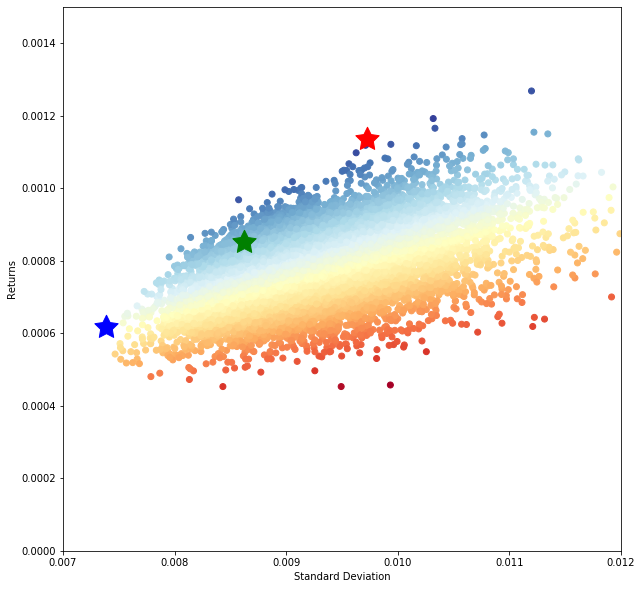

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.ylim(0,.0015)
plt.xlim(0.007,0.012)

#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)

#Plot a green star to highlight position of the portfolio with minimum Variance
plt.scatter(portfolio_std_dev_robot, portfolio_return_robot,marker=(5,1,0),color='g',s=600)

plt.show()

Портфель с максимальным коэффициентом Шарпа показан красной звездой, синей - с минимальным стандартным отклонением и зеленая - портфель, предложенный роботом.Как видно - портфель предложенный роботом не совпадает с этими показателями. На каком остановиться портфеле - выбор за инвестором. 